In [30]:
import os
import cv2
import numba as nb
import numpy as np
import csv
import matplotlib.pyplot as plt

In [186]:
seed = "0"
phase = "test"

dataroot = "D:/ai-diffraction/datasets/FDP/"
results = "D:/ai-diffraction/results/CD/seed" + seed + "_CD/" + phase + "_latest/images/"

In [187]:
avg_mse = 0
n = len(os.listdir(results))
for folder in os.listdir(results):
    code = folder.split("_")[0]
    fake = cv2.cvtColor(cv2.imread(
        results + code + "_structure_synthesized_image.png"
    ), cv2.COLOR_BGR2GRAY) / 255
    real = cv2.cvtColor(cv2.imread(
        dataroot + code + "/" + code + "_+0+0+0.png"
    ), cv2.COLOR_BGR2GRAY) / 255
    avg_mse += MSE(fake, real)
avg_mse /= n
print(avg_mse)

0.024346460487971427


In [148]:
def avg_dist(im1, im2):
    dist = 0
    for x in range(128):
        for y in range(128):
            dist = dist + np.abs(im1[y, x] - im2[y, x])
    dist /= (128**2)
    return dist

In [184]:
# @nb.njit
def MSE(im1, im2):
	err = np.sum((im1.astype("float") - im2.astype("float")) ** 2)
	err /= float(im1.shape[0] * im1.shape[1])
	return err

In [179]:
code = "834"

fake = cv2.cvtColor(cv2.imread(
    results + code + "_structure_synthesized_image.png"
), cv2.COLOR_BGR2GRAY) / 255
real = cv2.cvtColor(cv2.imread(
    dataroot + code + "/" + code + "_+0+0+0.png"
), cv2.COLOR_BGR2GRAY) / 255

print(MSE(fake, real)**0.5 * 255)
print(avg_dist(fake, real) * 255)

20.04526280783458
15.86065673828044


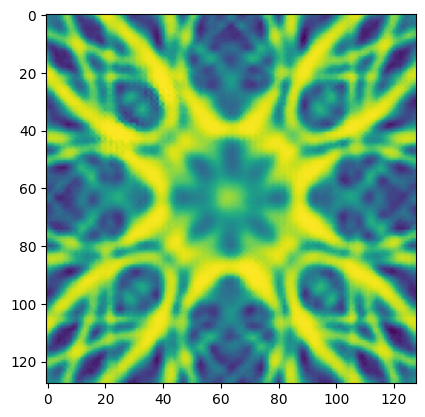

In [160]:
plt.imshow(fake)

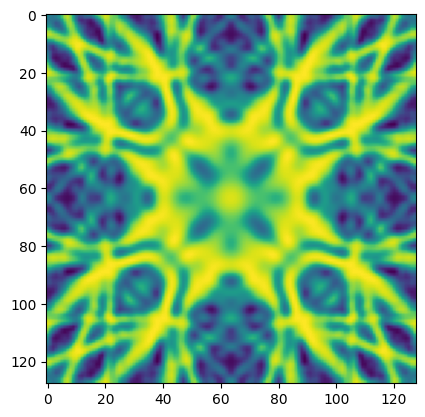

In [161]:
plt.imshow(real)

In [5]:
with open('losses.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["ICSD", "0"])
    
    for ICSD_code in os.listdir(dataroot):
        im1 = cv2.cvtColor(cv2.imread(os.path.join(dataroot, ICSD_code, ICSD_code + "_+0+0+0.png")), cv2.COLOR_BGR2GRAY)
        im2 = cv2.cvtColor(cv2.imread(os.path.join(results, ICSD_code + "_synthesized_image.jpg")), cv2.COLOR_BGR2GRAY)
        writer.writerow([ICSD_code, MSE(im1.astype(np.int16), im2.astype(np.int16))])